# Geothermal Development in the US Basin and Range

Data for this project was compiled during October 2020 from open sources. 

Data compilation and analysis below is work in progress by Irene Wallis.

Send any corrections for plant or reservoir MWe, in particular publicly available MWe generation numbers, to irene@cubicearth.nz

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Installed MWe for each reservoir

Reporting of installed capacity in the public space is somewhat varied, likely because of project variation through time and different conventions for these numbers (almost always without any statement about the convention used). Where the installed capacity of a reservoir as reported on a company website or presentation does not match the sum of the plant capacities complied from other open data sources, the company data are used. 

'development-byreservoir.csv' is all reservoirs that could be included inside the wider Basin and Range province (including the Walker Lane)

'development-byreservoir-trimmed.csv' removes those reservoirs that are clearly associated with shallow crustal magma (eg Mammoth Mountain is associated with an active volcano) and the Walker Lane systems Cove Fort and Roosevelt may have shallow crustal magmatic sources (Faulds and Hinz, 2015), but have not yet been excluded from the trimmed list. Further refinement is likely required and suggestions are welcome. 

In [3]:
#reserviors = pd.read_csv(r'development-byreservoir.csv')
reserviors = pd.read_csv(r'development-byreservoir-trimmed.csv')
reserviors

,Reservior,State,Installed_MWe,FirstGen
0,Amedee,California,1.600,1988
1,Beowawe,Nevada,19.900,1985
2,Blue Mountain,Nevada,49.500,2009
3,Bradys,Nevada,26.100,1992
4,Cove Fort,Utah,25.000,2013
5,Desert Peak,Nevada,23.000,1985
6,Dixie Valley,Nevada,72.000,1988
7,Don Campbell,Nevada,42.000,2013
8,Florida Canyon,Nevada,0.075,2012
9,Goodsprings,Nevada,7.000,2010


In [4]:
reserviors['Installed_MWe'].describe()

count     30.000000
mean      23.978167
std       28.375155
min        0.040000
25%        3.250000
50%       21.200000
75%       29.025000
max      143.000000
Name: Installed_MWe, dtype: float64

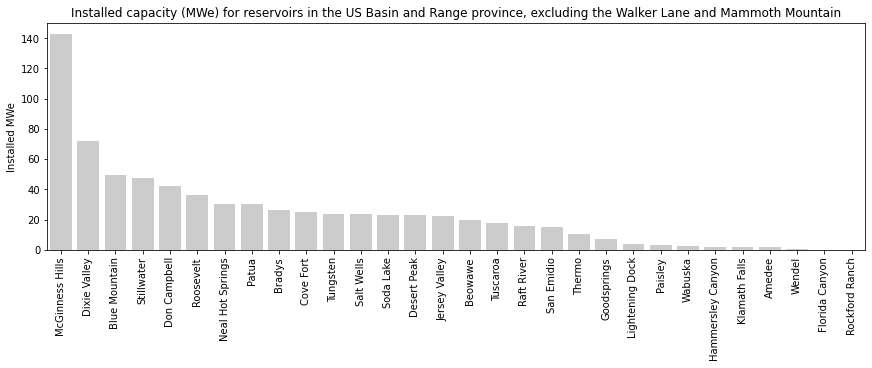

In [5]:
plt.figure(
    figsize=(12,5),
    constrained_layout=True,
)

sortedbymw = reserviors.sort_values(
    by = 'Installed_MWe',
    ascending=False
)

sns.barplot(
    x = 'Reservior',     
    y = 'Installed_MWe', 
    data = sortedbymw,
    color = '#cccccc'
) 

plt.title('Installed capacity (MWe) for reservoirs in the US Basin and Range province, excluding the Walker Lane and Mammoth Mountain')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Installed MWe')

plt.savefig('MWe-Per-Reservoir.png',dpi=400,bbox_inches='tight')
plt.show()

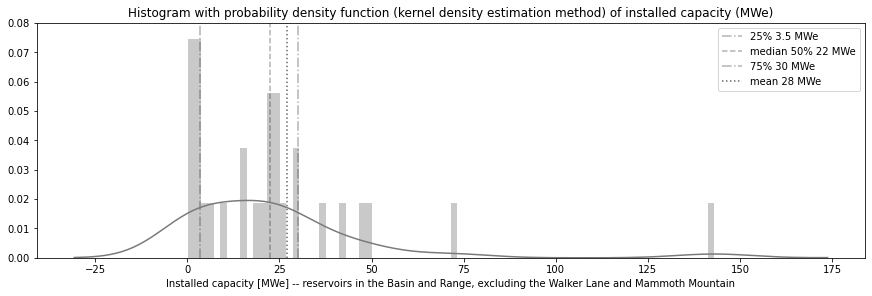

In [11]:
plt.figure(
    figsize=(12,4),
    constrained_layout=True,
)

sns.distplot(
    reserviors.Installed_MWe,
    bins = 80, # change this value to view the underlying distribution in different ways
    color = '#7a7a7a',
) 

plt.vlines(3.5,0,0.08,linestyle='-.',alpha=0.3,label='25% 3.5 MWe')
plt.vlines(22.5,0,0.08,linestyle='--',alpha=0.3,label='median 50% 22 MWe')
plt.vlines(30,0,0.08,linestyle='-.',alpha=0.3,label='75% 30 MWe')

plt.vlines(27,0,0.08,linestyle=':',alpha=0.6,label='mean 28 MWe')

plt.title('Histogram with probability density function (kernel density estimation method) of installed capacity (MWe)')

plt.xlabel('Installed capacity [MWe] -- reservoirs in the Basin and Range, excluding the Walker Lane and Mammoth Mountain')

plt.ylim(0,0.08)

plt.legend()

plt.savefig('MWe-Per-Reservoir-PDF.png',dpi=400,bbox_inches='tight')
plt.show()

The data presented here is installed (nameplate) capacity. Many of the reservoirs have not sustained generation at that level (refer to Ayling, 2020 for generation with time in Nevada) or may be capable of supporting more generation. 

In some projects, the economic power plant size drives a minimum installed MWe rather than the results from subsurface resource definition. In other projects, reservoirs have evolved in unforeseen ways (eg greater pressure decline or cooling than forecasted). 

We normally expect natural phenomena to have a lognormal distribution. If Basin and Range reservoir capacity adheres to this axiom, then numerous resources between 3.5 and 22 MWe would be present. 

Given the results of recent exploration and development in the Basin and Range (eg McGinness Hills), a number of hidden (blind) systems above the median may also remain as-yet undiscovered. However, this is speculation beyond the capacity data plotted here. 

## Power plant MWe 

The geothermal power plant list below includes all reservoirs in the wider province, including the Walker Lane and magmatic systems. 

In [13]:
plants = pd.read_csv(r'development-byplant.csv')
plants

,Reservior,Name,Comissioned,Type,Capacity_Mwe,NetGen_Mwe,Status,Owner
0,Amedee,Amedee,1988,binary,1.60,NaN,NaN,NaN
1,Beowawe,Beowawe,1985,double flash,18.00,NaN,NaN,Beowawe Power LLC
2,Beowawe,Beowawe 2,2011,binary,1.90,NaN,NaN,Terra-Gen Power
3,Blue Mountain,Blue Mountain Faulkner,2009,binary,50.00,NaN,NaN,Altarock
4,Bradys,Brady Hot Springs,1992,double flash,26.10,NaN,NaN,Ormat
5,Coso,Coso Finance Partners Geothermal Plant,1987,flash,90.20,NaN,NaN,NaN
6,Coso,Coso Energy Developers Geothermal Plant,1988,flash,90.00,NaN,NaN,NaN
7,Coso,Coso Power Developers Geothermal Plant,1989,flash,90.00,NaN,NaN,NaN
8,Cove Fort,Cove Fort,2013,binary,25.00,NaN,NaN,ENEL Green Power (Oski Energy phase 2?)
9,Desert Peak,Desert Peak (decommissioned),1985,flash,9.90,NaN,decommissioned 1985,Unknown


In [14]:
plants['Capacity_Mwe'].describe()

count    56.000000
mean     20.288750
std      22.360689
min       0.040000
25%       4.000000
50%      13.200000
75%      26.000000
max      90.200000
Name: Capacity_Mwe, dtype: float64

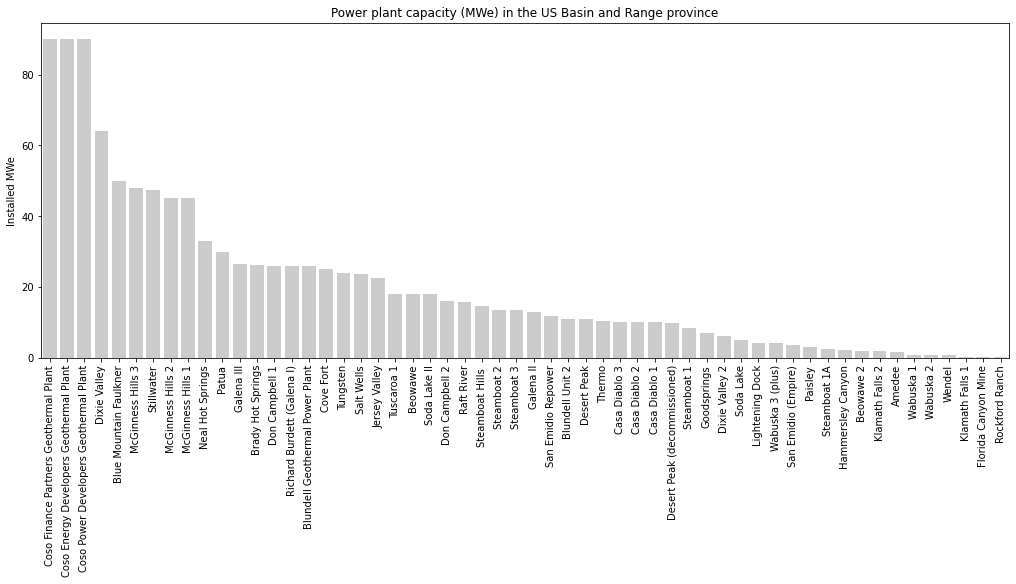

In [15]:
plt.figure(
    figsize=(14,8),
    constrained_layout=True,
)

sortedbymw = plants.sort_values(
    by = 'Capacity_Mwe',
    ascending=False
)

sns.barplot(
    x = 'Name',     
    y = 'Capacity_Mwe', 
    data = sortedbymw,
    color = '#cccccc'
) 

plt.title('Power plant capacity (MWe) in the US Basin and Range province')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Installed MWe')

plt.show()

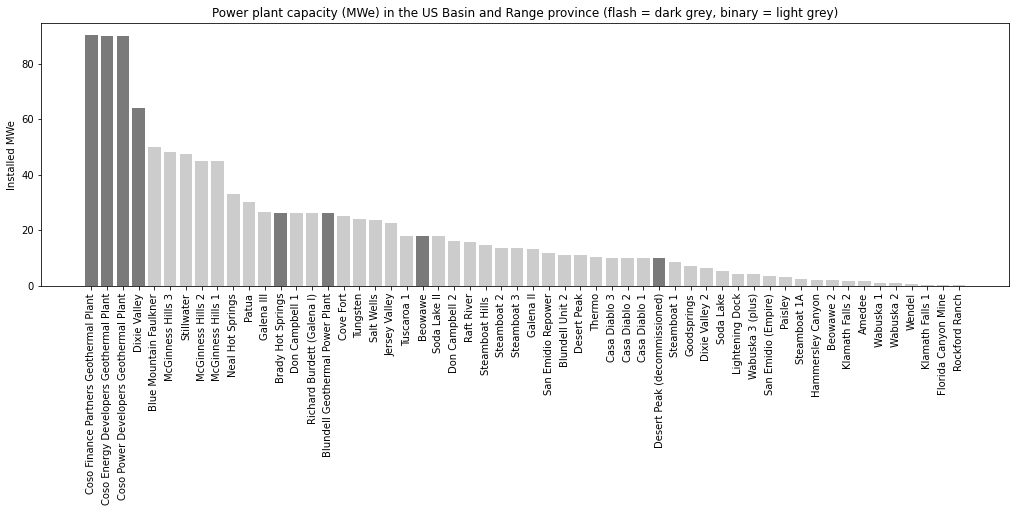

In [16]:
sortedbymw = plants.sort_values(
    by = 'Capacity_Mwe',
    ascending=False
)

x = sortedbymw.Name
y = sortedbymw.Capacity_Mwe

planttype = sortedbymw.Type
col = []
for val in planttype:
    if val == 'binary':
        col.append('#cccccc')
    elif val == 'flash':
        col.append('#7a7a7a')
    else:
        col.append('#7a7a7a')

plt.figure(
    figsize=(14,7),
    constrained_layout=True,
)

plt.bar(x,y, color = col)

plt.title('Power plant capacity (MWe) in the US Basin and Range province (flash = dark grey, binary = light grey)')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Installed MWe')

plt.show()

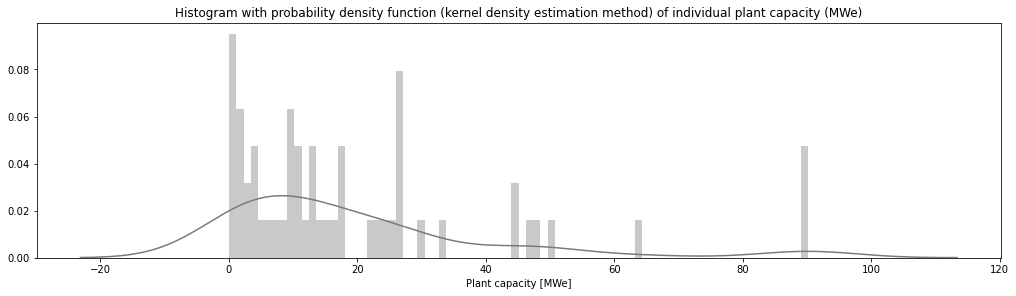

In [18]:
plt.figure(
    figsize=(14,4),
    constrained_layout=True,
)

sns.distplot(
    plants.Capacity_Mwe,
    bins = 80,
    color = '#7a7a7a',
) 

plt.title('Histogram with probability density function (kernel density estimation method) of individual plant capacity (MWe)')

plt.xlabel('Plant capacity [MWe]')

plt.show()

## Data Sources

The major collated sources of plant data:

- https://openei.org/wiki/Main_Page

- https://www.thinkgeoenergy.com/map/


Company web pages were also used:

- https://www.ormat.com/en/projects/all/main/

- https://cosoenergy.com/


Data was cross-checked from other sources like blogs and wikipedia pages, such as those linked below:

- https://en.wikipedia.org/wiki/List_of_geothermal_power_stations_in_the_United_States

- https://urbanecologycmu.wordpress.com/2016/11/01/geothermal-energy-oregon-institute-of-technology/

- https://en.wikipedia.org/wiki/Mammoth_Geothermal_Complex

- https://www.ouranosdatum.com/raftrivergeothermalresource-7-11-2019-edited

Paper on geothermal generation in Nevada:

- Ayling, B. F., 2020, 35 years of geothermal power generation in Nevada, USA: A review of field development, generation, and production histories Proceedings, 45th Workshop on Geothermal Reservoir Engineering: Stanford, CA. https://www.geothermal-energy.org/explore/our-databases/conference-paper-database/